### Import and Configuration:

In [268]:
import numpy as np
import pandas as pd
import random
import matplotlib.pyplot as plt
from wordcloud import WordCloud

from IPython.core.display import display, HTML
display(HTML("<style>.container { width:95% !important; }</style>"))

random.seed(149)

In [ ]:
def loaddata():
    return pd.read_csv('food_coded.csv')
data = loaddata()

## Preprocessing:

#### Employment:

In [ ]:
# employment, sample from prob dist and fill the missing values
probibility = data['employment'].value_counts() / data['employment'].value_counts().sum().tolist()
count_of_nas = pd.isna(data['employment']).sum()
values = probibility.cumsum().searchsorted(np.random.uniform(size=count_of_nas))
for i in xrange(len(values)):
    if values[i] == 0: values[i] = 2
    elif values[i] == 1: values[i] = 3
    else: values[i] = 1
index = 0
for i in xrange(len(data.employment)):
    if pd.isnull(data.iloc[i].employment):
        data.loc[i, 'employment'] = values[index]
        index += 1

#### Sports:

We took a look on the students' answers and compiled a list of their sports, then replaced their text answers with a comma seperated list of the sports they played. Morever, we replaced any other answers like "I don't play sports" and "not really" with an NA

In [ ]:
sports = ['car racing', 'basketball', 'softball', 'soccer', 'field hockey', 'running', 'volleyball', 'hockey', \
          'dancing', 'tennis', 'gym', 'football', 'lacrosse', 'snowboarding', 'wrestling', 'rowing', 'skiing', \
          'water polo', 'baseball', 'horse back riding', 'golf']
sports.sort(key=len, reverse=True)
#print data.type_sports.value_counts().sample(frac=1).head(15)
def func(x):
    output = ''
    for sport in sports:
        if pd.isnull(x): continue
        x = x.lower()
        if x.find(sport) != -1:
            output += sport + ','
            x.replace(sport, '')
    if len(output) == 0: return 'None'
    return output[:-1]
data.type_sports = data.type_sports.apply(func=func)

#print "\n\nAfter Processing:\n", data.type_sports.value_counts().head(15)
#print(data.type_sports.isnull().sum()) changed nans to none 

## Plots:
### First descriptive statistics:

In [ ]:
def bar_chart(attribute, ticks_values,label):
    plt.clf()
    plt.rcParams['figure.figsize'] = (7,7)
    y = data[attribute].value_counts()
    N = len(y)
    x = range(N)
    width = 0.5
    plt.bar(x, y, width, color="lightcoral" )
    plt.xlabel(label, fontsize=16)
    plt.ylabel('Count', fontsize=16)
    plt.tick_params(axis='both',which='major', labelsize=15)
    index = ind = np.arange(len(x)) 
    
    plt.xticks(index, ticks_values)

    plt.tight_layout()
    plt.show()

bar_chart('grade_level',('freshman' ,'Sophomore' ,'Junior' ,'Senior'),'Grade level')
bar_chart('diet_current_coded',('healthy' ,'unhelathy' ,'same thing' ,'unclear'),'current diet')
bar_chart('eating_changes_coded',('worse' ,'better' ,'same' ,'unclear'),'eating changes coded')


In [ ]:
#todo add label to the graph ?

def word_cloud(attribute,title):
    wordcloud = WordCloud(background_color='white' ).generate(str(data[attribute]))
    plt.rcParams['figure.figsize'] = (12,10)
    plt.imshow(wordcloud)
    plt.title(title)
    plt.axis('off')
    plt.show()
word_cloud('comfort_food','Comfort Food')
word_cloud('comfort_food_reasons', 'Comfort Food Reasons')
word_cloud('food_childhood', 'Favorite food in childhood')
word_cloud('type_sports', 'Type of sport practiced')

In [ ]:
# TODO: Remove useless columns: non-coded columns
#columns_we7sha = ["life_rewarding", "comfort_food_reasons_coded", "comfort_food_reasons"]

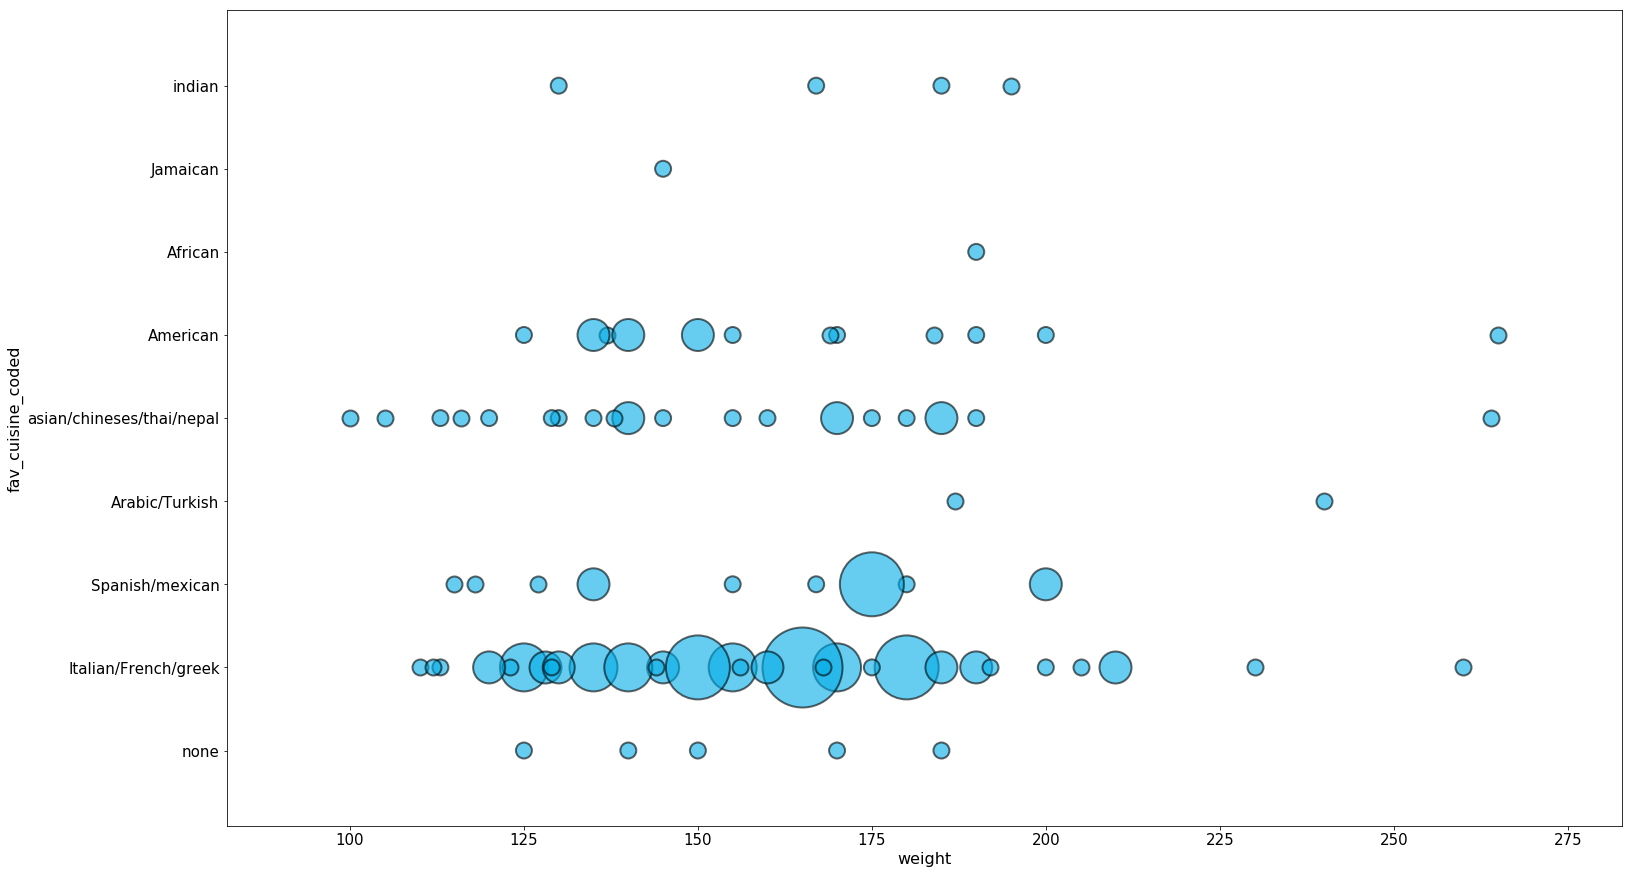

In [331]:
data = loaddata()

x_attribute = 'GPA'
y_attribute = 'eating_out'

def boxplot(attribute):
    plt.figure(dpi=100, figsize=(10,10))
    plt.rc('axes', axisbelow=True)
    plt.boxplot([list(data.query('Gender==1')[attribute].dropna()), list(data.query('Gender==2')[attribute].dropna())], labels=["Male", "Female"])
    plt.rc('axes', axisbelow=True)
#     plt.boxplot()
    plt.xlabel(attribute)
    plt.show()

def bubble_chart(x_attribute, x_ticks, y_attribute, y_ticks, size):
    plt.clf()
    plt.rcParams['figure.figsize'] = (25,15)
    fig, ax = plt.subplots()
    
    x_axis = data[x_attribute].round(decimals=1).dropna().unique()
    for mark in x_axis:
        y_axis =  data.query('%s == %f' % (x_attribute, mark))[y_attribute].dropna().unique()
        y_axis.sort()
        s = [(size * 20 * len(data.query('%s == %f & %s == %f' % (x_attribute, mark, y_attribute, i) ))) ** 2 for i in y_axis]
        x = [mark]*len(y_axis)
        plt.scatter(x, y_axis, s = s, color="#00ace6", alpha=0.6,edgecolors="black", linewidth=2)

    # plt.rcParams["figure.figsize"] = (15, 20)
    if len(y_ticks) == 0:
        y_ticks = data[y_attribute].round(decimals=1).dropna().unique()
    plt.yticks(range(len(y_ticks)), y_ticks)
#     ax.set_yticklabels(y_ticks)

#     plt.yticks(y_ticks)
    plt.tick_params
    if len(x_ticks) != 0:
        ax.set_xticklabels(x_ticks)
    plt.ylabel(y_attribute, fontsize= 16)
    plt.xlabel(x_attribute, fontsize= 16)
    plt.tick_params(axis='both', which='major', labelsize=15)
    plt.margins(0.1)
    plt.show()

    
def grouped_barchart(x_attribute, x_labels, y_attribute, legend, legend_title, plot_title=''):
    plt.clf()
    plt.rcParams['figure.figsize'] = (25,10)
    fig, ax = plt.subplots()

    x_axis_unique = data[x_attribute].round(decimals=1).dropna().unique()
    x_axis_unique.sort()

    y_axis_unique = data[y_attribute].round(decimals=1).dropna().unique()
    y_axis_unique.sort()

    ind = np.arange(len(x_axis_unique))    # the x locations for the groups
    width = 0.15                           # the width of the bars
    likert_colors = ['firebrick','lightcoral','grey','cornflowerblue', 'darkblue']
    for i in xrange(len(y_axis_unique)):
        y = y_axis_unique[i]
        counts = []
        for x in x_axis_unique:
            counts += [len(data.query('%s == %f & %s == %f' % (x_attribute, x, y_attribute, y)))]
        plt.bar(ind + i*width, counts, width, bottom=0, color=likert_colors[i])
    
    if plot_title == '': plot_title = ('%s vs %s' % (x_attribute.replace('_', ' '), y_attribute.replace('_', ' ')))
    ax.set_title(plot_title,  fontsize=20)
    ax.set_xticks(ind + 1*width / 2)
    ax.set_xticklabels(x_labels)

    plt.xlabel(x_attribute, fontsize=20)
    plt.ylabel('Count', fontsize=20)
    plt.tick_params(axis='both', which='major', labelsize=15)
    plt_legend = plt.legend(legend, title=legend_title, fontsize=15)
    plt_legend.get_title().set_fontsize('15')
    plt.show()


# grouped_barchart('eating_out', ['Never', '1-2 times', '2-3 times', '3-5 times', 'everyday'], 'nutritional_check', ['Never', 'on certain products only', 'very rarely', 'on most products', 'on everything'], 'How Often do you Check Nutrition')
# grouped_barchart('eating_out', ['Never', '1-2 times', '2-3 times', '3-5 times', 'everyday'], 'on_off_campus', ['On campus', 'rent out of campus', 'with parents', 'own house'], 'Accommodation', 'Students accommodation and eating out habbits')
bubble_chart('weight', [], 'fav_cuisine_coded', ["none", "Italian/French/greek", "Spanish/mexican", "Arabic/Turkish", "asian/chineses/thai/nepal", "American", "African", "Jamaican", "indian"] , 0.8)

# boxplot('weight')

In [ ]:
fig, ax = plt.subplots(figsize=(15, 7))
data.groupby(by=('fav_cuisine_coded', 'weight')).count().unstack().plot(ax=ax)


In [ ]:
data["counter"] = 1
d = data.groupby(['fav_cuisine_coded', 'weight']).sum()
e = d.counter
# print d.loc[:, ['fav_cuisine_coded', 'weight', 'counter']].reset_index()
final = d.reset_index().loc[:, ['fav_cuisine_coded', 'weight', 'counter']]

# print final
# plt.scatter(final.fav_cuisine_coded, final.weight)
# print final
# plt.show()
# plt.show()

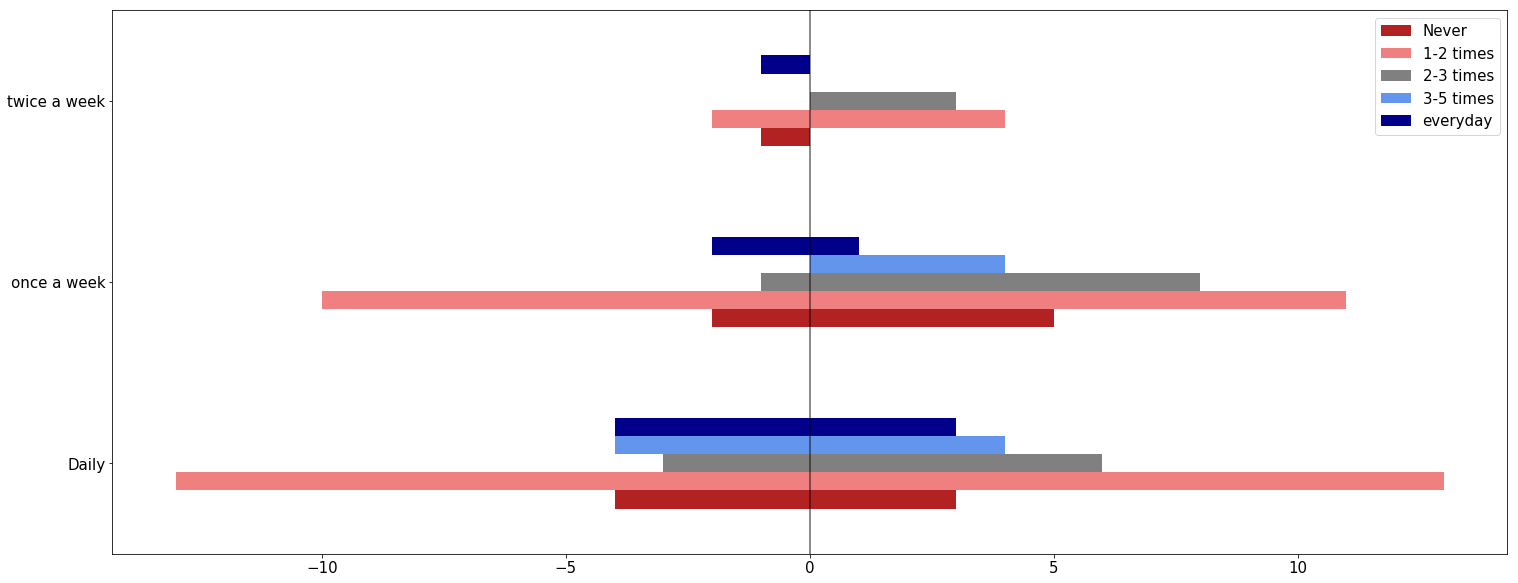

In [319]:
def horizontal_barchart(y_attribute, y_ticks, x_attribute, legend=[], legend_title='', plot_title=''):
    plt.clf()
    plt.rcParams['figure.figsize'] = (25,10)

    x_axis_unique = data[x_attribute].round(decimals=1).dropna().unique()
    x_axis_unique.sort()

    y_axis_unique = data[y_attribute].round(decimals=1).dropna().unique()
    y_axis_unique.sort()

    ind = np.arange(len(x_axis_unique))    # the x locations for the groups
    likert_colors = ['firebrick','lightcoral','grey','cornflowerblue', 'darkblue']
    all_counts1 = []
    all_counts2 = []
    for i in xrange(len(y_axis_unique)):
        y = y_axis_unique[i]
        counts1 = []
        counts2 = []
        counts1 += [len(data.query('%s == %f & %s == %f & Gender == 1' % (x_attribute, x, y_attribute, y))) for x in x_axis_unique]
        counts2 += [-len(data.query('%s == %f & %s == %f & Gender == 2' % (x_attribute, x, y_attribute, y))) for x in x_axis_unique]
        all_counts1 += [counts1]
        all_counts2 += [counts2]

    xvalues = range(-30, 30, 5)
    male_data = pd.DataFrame(all_counts1,
                    columns=x_axis_unique,
                    index=y_axis_unique)
    ax = male_data.plot.barh(color=likert_colors, edgecolor='none', legend=False)
    
    female_data = pd.DataFrame(all_counts2,
                    columns=x_axis_unique,
                    index=y_axis_unique)
    female_data.plot.barh(color= likert_colors, edgecolor='none', ax = ax)

    plt.legend(legend)
    plt.yticks(range(len(y_ticks)), y_ticks)
    plt.tick_params(axis='both', which='major', labelsize=15)

    plt_legend = plt.legend(legend, title=legend_title, fontsize=15)
    plt_legend.get_title().set_fontsize('15')
    plt.axvline(x=0, color='black', alpha=0.6, linestyle='-')
    plt.show()

horizontal_barchart('exercise', ['Daily', 'once a week', 'twice a week'], 'eating_out', legend = ['Never', '1-2 times', '2-3 times', '3-5 times', 'everyday'])

In [ ]:
horizontal_barchart('exercise', ['Daily', 'once a week', 'twice a week'], 'eating_out', legend = ['Never', '1-2 times', '2-3 times', '3-5 times', 'everyday'])

In [ ]:
# [data.fav_cuisine_coded.tolist().count(i) for i in data.fav_cuisine_coded.unique()]
# data.fav_cuisine_coded.value_counts()
#data.columns.tolist()
class_data = pd.DataFrame(data.loc[:,['GPA',
 'Gender',
 'breakfast',
 'calories_chicken',
 'calories_scone',
 'coffee',
 'cook',
 'comfort_food_reasons_coded',
 'cuisine',
 'diet_current_coded',
 'drink',
 'eating_changes_coded',
 'eating_changes_coded1',
 'eating_out',
 'employment',
 'ethnic_food',
 'exercise',
 'father_education',
 'fav_cuisine_coded',
 'fav_food',
 'fries',
 'fruit_day',
 'grade_level',
 'greek_food',
 'healthy_feeling',
 'ideal_diet_coded',
 'income',
 'indian_food',
 'italian_food',
 'life_rewarding',
 'marital_status',
 'mother_education',
 'nutritional_check',
 'on_off_campus',
 'parents_cook',
 'pay_meal_out',
 'persian_food',
 'self_perception_weight',
 'soup',
 'sports',
 'thai_food',
 'tortilla_calories',
 'turkey_calories',
 'veggies_day',
 'waffle_calories',
 'weight']])

weight_mean = np.nanmean(data['weight'])
class_data.weight = class_data.weight.fillna(weight_mean)

# GPA_mode = data['GPA'].mode()
# print(sum(class_data.GPA.isna().fillna(GPA_mode)))

from sklearn.decomposition import PCA
pca =  PCA(n_components=2)
# class_data.

for col in class_data.columns:
    #print sum(class_data[col].isnull())
    class_data.loc[:,col] = class_data[col].fillna(class_data[col].mode()[0])
#     print sum(class_data[col].isnull())
# class_data.isnull().sum()

fit = pca.fit(class_data).transform(class_data)

mat = fit.transpose()
plt.scatter(mat[0], mat[1])
plt.show()
#fit.components_[0]

In [ ]:
import seaborn as sns
from sklearn.cluster import KMeans
from IPython.html.widgets import interact
colors = sns.color_palette(n_colors=10)


#mds_pos = mds.fit(data.data).embedding_

@interact(n_clusters=(1,10))
def draw_plot(n_clusters):
    instance = KMeans(n_clusters=n_clusters, random_state = 102)
    clusters_assignment = instance.fit_predict(class_data)
    plt.scatter(mat[0], mat[1], s=20, c=[colors[i] for i in clusters_assignment])
    plt.show()

In [ ]:
#TODO
# cusine & weight

# current diet & eating changes
# weight & eating out
# weight & exercise 
# nutritional_check
# on_off_campu
# parents_cook
# sports


# 